<img src="res/logo/coolpi.png" width="200">

# Notebook

# 02a. - Colour Objects

## Import packages 

In [1]:
import sys
sys.version 

'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [2]:
import os
%matplotlib inline

## CIE XYZ

In [3]:
from coolpi.colour.cie_colour_spectral import CIEXYZ

### Create an instance:

To create an instance of the `CIEXYZ` class, simply enter the required parameters as follows:

In [4]:
sample_XYZ = CIEXYZ(name_id="Sample_1", X=10.234, Y=5.871, Z=22.109, cie_illuminant="D65", observer=2)

An *Illuminant* instance can also be passed as a parameter:

In [5]:
from coolpi.colour.cie_colour_spectral import Illuminant
D65 = Illuminant("D65")

In [6]:
sample_XYZ = CIEXYZ(name_id="Sample_1", X=10.234, Y=5.871, Z=22.109, cie_illuminant=D65, observer=2)

The colour sample should be referred to a valid CIE standard illuminant and observer:

In [7]:
sample_XYZ = CIEXYZ(name_id="Sample_1", X=10.234, Y=5.871, Z=22.109, cie_illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [8]:
sample_XYZ = CIEXYZ(name_id="Sample_1", X=10.234, Y=5.871, Z=22.109, cie_illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [9]:
print(sample_XYZ.type)
print(sample_XYZ.colour_space()) # subtype
print(sample_XYZ.subtype) # returns colour space
print(sample_XYZ.name_id)
print(sample_XYZ.coordinates)
print(sample_XYZ.illuminant)
print(sample_XYZ.observer) # Observer str method
print(sample_XYZ.get_sample()) # colour data as dict

Colour Object
CIE XYZ
CIE XYZ
Sample_1
[10.234, 5.871, 22.109]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [10.234, 5.871, 22.109]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [10]:
print(sample_XYZ)

CIEXYZ object: Sample_1 : X =10.234, Y=5.871, Z=22.109


`Colour Space Conversion`

It is only necessary to execute the class method that performs the colour conversion to the output colour space, for example:

In [11]:
sample_xyY = sample_XYZ.to_xyY() # returns a CIExyY class object
type(sample_xyY)

coolpi.colour.cie_colour_spectral.CIExyY

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [12]:
print("xyY   = ", sample_XYZ.to_xyY().coordinates)
print("uvY   = ", sample_XYZ.to_uvY().coordinates)
print("LAB   = ", sample_XYZ.to_LAB().coordinates)
print("LCHab = ", sample_XYZ.to_LCHab().coordinates)
print("LUV   = ", sample_XYZ.to_LUV().coordinates)
print("LCHuv = ", sample_XYZ.to_LCHuv().coordinates)

xyY   =  [0.2678076097765217, 0.1536347935311666, 5.871]
uvY   =  [0.24866060039118973, 0.320963881768372, 5.871]
LAB   =  [29.084647940987004, 43.545094568382126, -39.82173471482208]
LCHab =  [29.084647940987004, 59.008014851094664, 317.5572656376388]
LUV   =  [29.084647940987004, 19.22024307991132, -55.72304917618993]
LCHuv =  [29.084647940987004, 58.94468554113221, 289.03056690015865]


RGB

In [13]:
print("sRGB     = ", sample_XYZ.to_RGB(rgb_name_space = "sRGB").coordinates)
print("AdobeRGB = ", sample_XYZ.to_RGB(rgb_name_space = "Adobe").coordinates)
print("AppleRGB = ", sample_XYZ.to_RGB(rgb_name_space = "Apple").coordinates)

sRGB     =  [0.39755114527023666, 0.1523320829991103, 0.5141947956274906]
AdobeRGB =  [0.3484283664374471, 0.1522825496876888, 0.5051836729448721]
AppleRGB =  [0.3835002641849221, 0.12346656707261819, 0.5212116703733893]


Note: The colour conversion between CIE XYZ and the other CIE spaces is implemented as methods of the class itself. However, it is possible to apply the transformation functions between colour spaces by importing the module `colour_space_conversion`. 

Please, see notebook `05_Colour_Space_Conversion.ipynb`.

### CATs - Chromatic Adaptation Transforms

CATs are implemented as methods of CIEXYZ class 

To CIE Illuminant

A new *CIEXYZ* instance is created with the XYZ values referred to the new illuminant.

In [14]:
sample_XYZ_d50 = sample_XYZ.to_CIE_illuminant(to_cie_illuminant_name ="D50", to_observer=2, cat_model="Bradford")
type(sample_XYZ_d50)

coolpi.colour.cie_colour_spectral.CIEXYZ

Note: The models implemented are: "von Kries", "Bradford", "Sharp", "CMCCAT200", "CAT02", "BS", "BSPC".

Attributes

In [15]:
print(sample_XYZ_d50.colour_space())
print(sample_XYZ_d50.name_id)
print(sample_XYZ_d50.coordinates)
print(sample_XYZ_d50.illuminant)
print(sample_XYZ_d50.observer) 
print(sample_XYZ_d50.get_sample())

CIE XYZ
Sample_1
[9.893278796703505, 5.7763373686957, 16.63362389551362]
Illuminant object: CIE D50 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [9.893278796703505, 5.7763373686957, 16.63362389551362]}


Also, it is possible to apply a CAT transform using a user illuminant white point ($X_{n2}$, $Y_{n2}$, $Z_{n2}$). 

The method returns the XYZ coordinates under the new illuminant:

In [16]:
X2, Y2, Z2 = sample_XYZ.to_user_illuminant(Xn2=91.4, Yn2=102.3, Zn2=37.8, cat_model="Bradford")
print(f"The XYZ values in the new illuminant are: {X2}, {Y2}, {Z2}")

The XYZ values in the new illuminant are: 8.233072778635329, 5.34612439356663, 7.078762278967476


## CIE xyY

In [17]:
from coolpi.colour.cie_colour_spectral import CIExyY

### To create an instance:

To create an instance of the `CIExyY` class, simply enter the required parameters as follows:

In [18]:
sample_xyY = CIExyY(name_id="Sample_1", x=0.26781, y=0.15364, Y=5.871, cie_illuminant="D65", observer=2)

An *Illuminant* instance can also be passed as a parameter:

In [19]:
sample_xyY = CIExyY(name_id="Sample_1", x=0.26781, y=0.15364, Y=5.871, cie_illuminant=D65, observer=2)

The colour sample should be referred to a valid CIE standard illuminant and observer:

In [20]:
sample_xyY = CIExyY(name_id="Sample_1", x=0.26781, y=0.15364, Y=5.871, cie_illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [21]:
sample_xyY = CIExyY(name_id="Sample_1", x=0.26781, y=0.15364, Y=5.871, cie_illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [22]:
print(sample_xyY.type)
print(sample_xyY.colour_space()) # subtype
print(sample_xyY.subtype) # returns colour space
print(sample_xyY.name_id)
print(sample_xyY.coordinates)
print(sample_xyY.illuminant)
print(sample_xyY.observer) # str method
print(sample_xyY.get_sample()) # colour data as dict

Colour Object
CIE xyY
CIE xyY
Sample_1
[0.26781, 0.15364, 5.871]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [0.26781, 0.15364, 5.871]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [23]:
print(sample_xyY)

CIExyY object: Sample_1 : x =0.26781, y=0.15364, Y=5.871


`Colour space conversion`:

It is only necessary to execute the class method that performs the colour conversion to the output colour space, for example:

In [24]:
sample_uvY = sample_xyY.to_uvY() # returns a CIELAB class object
type(sample_uvY)

coolpi.colour.cie_colour_spectral.CIEuvY

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [25]:
print("XYZ   = ", sample_xyY.to_XYZ().coordinates)
print("uvY   = ", sample_xyY.to_uvY().coordinates)
print("LAB   = ", sample_xyY.to_LAB().coordinates)
print("LCHab = ", sample_xyY.to_LCHab().coordinates)
print("LUV   = ", sample_xyY.to_LUV().coordinates)
print("LCHuv = ", sample_xyY.to_LCHuv().coordinates)

XYZ   =  [10.233744532673784, 5.871, 22.107960492059362]
uvY   =  [0.24865948942215288, 0.32097046002144813, 5.871]
LAB   =  [29.084647940987004, 43.54311522120996, -39.81989232614932]
LCHab =  [29.084647940987004, 59.005310846005145, 317.55728877376833]
LUV   =  [29.084647940987004, 19.21982302204829, -55.72056193591771]
LCHuv =  [29.084647940987004, 58.942197273712985, 289.03096925944504]


RGB

In [26]:
print("sRGB     = ", sample_xyY.to_RGB(rgb_name_space = "sRGB").coordinates)
print("AdobeRGB = ", sample_xyY.to_RGB(rgb_name_space = "Adobe").coordinates)
print("AppleRGB = ", sample_xyY.to_RGB(rgb_name_space = "Apple").coordinates)

sRGB     =  [0.3975466946551014, 0.1523408468071324, 0.5141831884504302]
AdobeRGB =  [0.3484256104933206, 0.15229131747801383, 0.5051723823847176]
AppleRGB =  [0.38349633557812984, 0.12347918390545604, 0.5211998170812592]


### CIE 1931 x,y Chromaticity Diagram 

*CIExyY* objects can be represented in the CIE 1931 Chromaticity Diagram as follows:

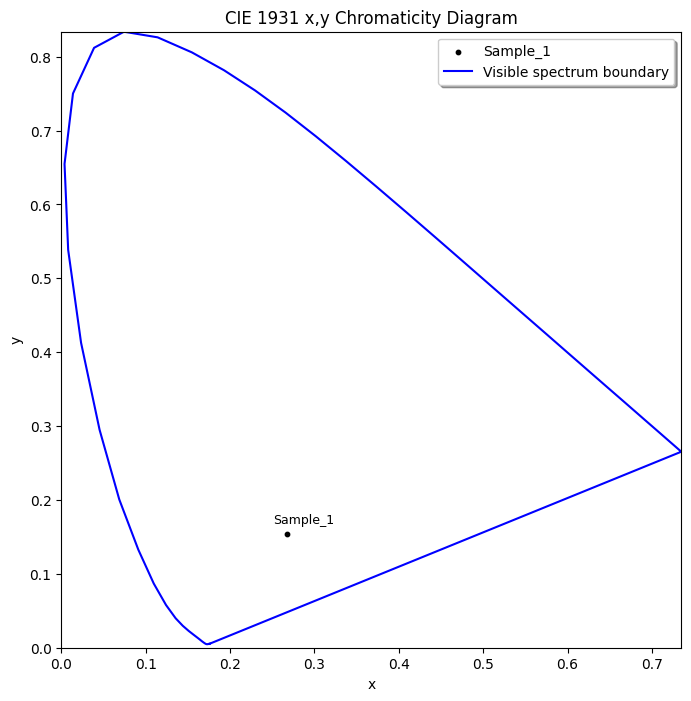

In [27]:
sample_xyY.plot()

To save the figure:

Note: It is possible to save the figure by specifying save_figure = `True`, and entering the output path

In [28]:
path_figure = os.path.join(*["res", "plot", "xy_sample.png"]) # your path here
sample_xyY.plot(show_figure = False, save_figure = True, output_path = path_figure)

## CIEuvY

In [29]:
from coolpi.colour.cie_colour_spectral import CIEuvY

### To create an instance

To create an instance of the `CIEuvY` class, simply enter the required parameters as follows:

In [30]:
sample_uvY = CIEuvY(name_id="Sample_1", u=0.24866, v=0.32096, Y=5.871, cie_illuminant="D65", observer=2)

An *Illuminant* instance can also be passed as a parameter:

In [31]:
sample_uvY = CIEuvY(name_id="Sample_1", u=0.24866, v=0.32096, Y=5.871, cie_illuminant=D65, observer=2)

The colour sample should be referred to a valid CIE standard illuminant and observer:

In [32]:
sample_uvY = CIEuvY(name_id="Sample_1", u=0.24866, v=0.32096, Y=5.871, cie_illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [33]:
sample_uvY = CIEuvY(name_id="Sample_1", u=0.24866, v=0.32096, Y=5.871, cie_illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [34]:
print(sample_uvY.type)
print(sample_uvY.colour_space()) # subtype
print(sample_uvY.subtype) # returns colour space
print(sample_uvY.name_id)
print(sample_uvY.coordinates)
print(sample_uvY.illuminant) # str method
print(sample_uvY.observer) # str method
print(sample_uvY.get_sample()) # colour data as dict

Colour Object
CIE u'v'Y
CIE u'v'Y
Sample_1
[0.24866, 0.32096, 5.871]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [0.24866, 0.32096, 5.871]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [35]:
print(sample_uvY)

CIEuvY object: Sample_1 : u' =0.24866, v'=0.32096, Y=5.871


`Colour space conversion`:

It is only necessary to execute the class method that performs the colour conversion to the output colour space, for example:

In [36]:
sample_LAB = sample_uvY.to_LAB() # returns a CIELAB class object
type(sample_LAB)

coolpi.colour.cie_colour_spectral.CIELAB

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [37]:
print("XYZ   = ", sample_uvY.to_XYZ().coordinates)
print("xyY   = ", sample_uvY.to_xyY().coordinates)
print("LAB   = ", sample_uvY.to_LAB().coordinates)
print("LCHab = ", sample_uvY.to_LCHab().coordinates)
print("LUV   = ", sample_uvY.to_LUV().coordinates)
print("LCHuv = ", sample_uvY.to_LCHuv().coordinates)

XYZ   =  [10.234099062188434, 5.871, 22.109630654910273]
xyY   =  [0.26780508819376303, 0.15363185984730635, 5.871]
LAB   =  [29.084647940987004, 43.5458620880538, -39.82285243808329]
LCHab =  [29.084647940987004, 59.00933554359986, 317.55696768515674]
LUV   =  [29.084647940987004, 19.220016071748365, -55.72451687445427]
LCHuv =  [29.084647940987004, 58.94599900493335, 289.02989312888906]


RGB

In [38]:
print("sRGB     = ", sample_uvY.to_RGB(rgb_name_space = "sRGB").coordinates)
print("AdobeRGB = ", sample_uvY.to_RGB(rgb_name_space = "Adobe").coordinates)
print("AppleRGB = ", sample_uvY.to_RGB(rgb_name_space = "Apple").coordinates)

sRGB     =  [0.3975512398171586, 0.15232908950474702, 0.5142018048920176]
AdobeRGB =  [0.34842811042674693, 0.15227955537015053, 0.5051905145986682]
AppleRGB =  [0.383500167319504, 0.12346212215521132, 0.5212188124193071]


## CIELAB

In [39]:
from coolpi.colour.cie_colour_spectral import CIELAB

### To create an instance:

To create an instance of the `CIELAB` class, simply enter the required parameters as follows:

In [40]:
sample_LAB = CIELAB(name_id="Sample_1", L=29.08465, a=43.545095, b=-39.821735, cie_illuminant="D65", observer=2)

An *Illuminant* instance can also be passed as a parameter:

In [41]:
sample_LAB = CIELAB(name_id="Sample_1", L=29.08465, a=43.545095, b=-39.821735, cie_illuminant=D65, observer=2)

The colour sample should be referred to a valid CIE standard illuminant and observer:

In [42]:
sample_LAB = CIELAB(name_id="Sample_1", L=29.08465, a=43.545095, b=-39.821735, cie_illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [43]:
sample_LAB = CIELAB(name_id="Sample_1", L=29.08465, a=43.545095, b=-39.821735, cie_illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [44]:
print(sample_LAB.type)
print(sample_LAB.colour_space()) # subtype
print(sample_LAB.subtype) # returns colour space
print(sample_LAB.name_id)
print(sample_LAB.coordinates)
print(sample_LAB.illuminant) # str method
print(sample_LAB.observer) # str method
print(sample_LAB.get_sample()) # colour data as dict

Colour Object
CIE LAB
CIE LAB
Sample_1
[29.08465, 43.545095, -39.821735]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [29.08465, 43.545095, -39.821735]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [45]:
print(sample_LAB)

CIELAB object: Sample_1 : L* =29.08465, a*=43.545095, b*=-39.821735


`Colour space conversion`:

It is only necessary to execute the class method that performs the colour conversion to the output colour space, for example:

In [46]:
sample_LCHab = sample_LAB.to_LCHab() # returns a CIELCHab class object
type(sample_LCHab)

coolpi.colour.cie_colour_spectral.CIELCHab

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [47]:
print("XYZ   = ", sample_LAB.to_XYZ().coordinates)
print("xyY   = ", sample_LAB.to_xyY().coordinates)
print("uvY   = ", sample_LAB.to_uvY().coordinates)
print("LCHab = ", sample_LAB.to_LCHab().coordinates)
print("LUV   = ", sample_LAB.to_LUV().coordinates)
print("LCHuv = ", sample_LAB.to_LCHuv().coordinates)

XYZ   =  [10.234001201189463, 5.871000804384624, 22.109002163921144]
xyY   =  [0.2678076119895039, 0.1536347978176864, 5.871000804384624]
uvY   =  [0.24866059973237598, 0.3209638872208844, 5.871000804384624]
LCHab =  [29.08465, 59.008015362061194, 317.5572657161243]
LUV   =  [29.084649999999996, 19.220244191487748, -55.72305105943939]
LCHuv =  [29.084649999999996, 58.94468768390675, 289.03056732468815]


RGB

In [48]:
print("sRGB     = ", sample_LAB.to_RGB(rgb_name_space = "sRGB").coordinates)
print("AdobeRGB = ", sample_LAB.to_RGB(rgb_name_space = "Adobe").coordinates)
print("AppleRGB = ", sample_LAB.to_RGB(rgb_name_space = "Apple").coordinates)

sRGB     =  [0.3975511679443915, 0.1523321016451217, 0.5141948184670979]
AdobeRGB =  [0.34842838757648475, 0.15228256833385487, 0.5051836955284814]
AppleRGB =  [0.3835002864652972, 0.12346658709318589, 0.521211693412172]


### Plot

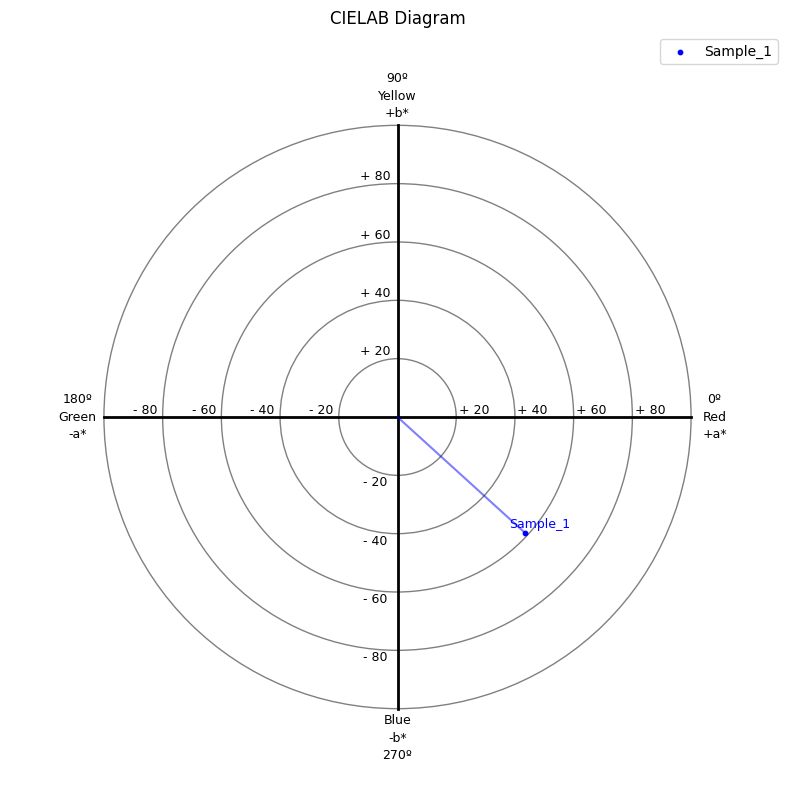

In [49]:
sample_LAB.plot(show_figure = True, save_figure = False, output_path = None)

To save the figure:

In [50]:
path_figure = os.path.join(*["res", "plot", "cielab_sample.png"]) # your path here
sample_LAB.plot(show_figure = False, save_figure = True, output_path = path_figure)

`Colour difference`:

$\Delta E_{ab}^*$ Colour Difference

Given two *CIELAB* colour samples, it is posible to compute the $\Delta E_{ab}$ colour difference between them as follows:

In [51]:
S1_LAB = CIELAB(name_id="Sample_1", L=29.084648, a=43.545095, b=-39.821735, cie_illuminant="D65", observer=2)
S2_LAB = CIELAB(name_id="Sample_2", L=35.893646, a=15.903706, b=-29.659472, cie_illuminant="D65", observer=2)

In [52]:
AE_ab = S1_LAB.delta_e_ab(S2_LAB)
print(AE_ab)

30.22714721726968


In [53]:
AE_ab = S2_LAB.delta_e_ab(S1_LAB)
print(AE_ab)

30.22714721726968


The *CIELAB* reference and target objects should be measured under the same illuminant:

In [54]:
S3_LAB = CIELAB(name_id="Sample_3", L=35.893646, a=15.903706, b=-29.659472, cie_illuminant="D50", observer=2)

In [55]:
AE_ab = S1_LAB.delta_e_ab(S3_LAB)
print(AE_ab)

CIEIlluminantError: The CIELAB target must be referred to the same illuminant D65.

The reference and the colour target should be referred to the same colour space:

In [56]:
S3_XYZ = CIEXYZ(name_id="Sample_3", X=10.345, Y=20.367, Z=36.972, cie_illuminant="D65", observer=2)

In [57]:
AE_ab = S1_LAB.delta_e_ab(S3_XYZ)

ClassTypeError: The input target is not a CIELAB colour object.

CIELAB2000

To compute the CIEDE2000 colour difference:

In [58]:
AE_00 = S1_LAB.CIEDE2000(S2_LAB)
print(AE_00)

13.205811623182113


Note: The colour sample entered as a parameter must be a valid CIELAB object measured under the same illuminant.

## CIE LCHab

In [59]:
from coolpi.colour.cie_colour_spectral import CIELCHab

### To create an instance:

To create an instance of the `CIELCHab` class, simply enter the required parameters as follows:

In [60]:
sample_LCHab = CIELCHab(name_id="Sample_1", L=29.08465, Cab=59.008015, Hab=317.557266, cie_illuminant="D65", observer=2)

The colour sample should be referred to a valid CIE standard illuminant and observer:

In [61]:
sample_LCHab = CIELCHab(name_id="Sample_1", L=29.08465, Cab=59.008015, Hab=317.557266, cie_illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [62]:
sample_LCHab = CIELCHab(name_id="Sample_1", L=29.08465, Cab=59.008015, Hab=317.557266, cie_illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [63]:
print(sample_LCHab.type)
print(sample_LCHab.colour_space()) # subtype
print(sample_LCHab.subtype) # returns colour space
print(sample_LCHab.name_id)
print(sample_LCHab.coordinates)
print(sample_LCHab.illuminant) # str method
print(sample_LCHab.observer) # str method
print(sample_LCHab.get_sample()) # colour data as dict

Colour Object
CIE LCHab
CIE LCHab
Sample_1
[29.08465, 59.008015, 317.557266]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [29.08465, 59.008015, 317.557266]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [64]:
print(sample_LCHab)

CIELCHab object: Sample_1 : L* =29.08465, C*ab=59.008015, h*ab=317.557266


`Colour space conversion`:

It is only necessary to execute the class method that performs the colour conversion to the output colour space, for example:

In [65]:
sample_LUV = sample_LCHab.to_LUV() # returns a CIELUV class object
type(sample_LUV)

coolpi.colour.cie_colour_spectral.CIELUV

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [66]:
print("XYZ   = ", sample_LCHab.to_XYZ().coordinates)
print("xyY   = ", sample_LCHab.to_xyY().coordinates)
print("uvY   = ", sample_LCHab.to_uvY().coordinates)
print("LAB   = ", sample_LCHab.to_LAB().coordinates)
print("LUV   = ", sample_LCHab.to_LUV().coordinates)
print("LCHuv = ", sample_LCHab.to_LCHuv().coordinates)

XYZ   =  [10.234001192169652, 5.871000804384624, 22.10900190432898]
xyY   =  [0.26780761363592964, 0.15363479889760845, 5.871000804384624]
uvY   =  [0.24866060070314994, 0.3209638887568151, 5.871000804384624]
LAB   =  [29.08465, 43.54509493011557, -39.821734539914864]
LUV   =  [29.084649999999996, 19.220244558537818, -55.723050478703314]
LCHuv =  [29.084649999999996, 58.9446872545959, 289.03056784603535]


RGB

In [67]:
print("sRGB     = ", sample_LCHab.to_RGB(rgb_name_space = "sRGB").coordinates)
print("AdobeRGB = ", sample_LCHab.to_RGB(rgb_name_space = "Adobe").coordinates)
print("AppleRGB = ", sample_LCHab.to_RGB(rgb_name_space = "Apple").coordinates)

sRGB     =  [0.3975511693849829, 0.15233210155791194, 0.5141948156003442]
AdobeRGB =  [0.3484283887766336, 0.1522825682460794, 0.505183692716826]
AppleRGB =  [0.3835002879135414, 0.12346658710006109, 0.5212116905001472]


`Colour difference`:

$\Delta E_{ab}^*$ Colour Difference:

Given two *CIELCHab* colour samples, it is posible to compute the $\Delta E_{ab}$ colour difference between them as follows:

In [68]:
S1_LCHab = CIELCHab(name_id="Sample_1", L=29.08465, Cab=59.008015, Hab=317.557266, cie_illuminant="D65", observer=2)
S2_LCHab = CIELCHab(name_id="Sample_2", L=35.893646, Cab=33.654304, Hab=298.200655, cie_illuminant="D65", observer=2)

In [69]:
AE_ab = S1_LCHab.delta_e_ab(S2_LCHab)
print(AE_ab)

30.22714623748055


$\Delta H_{ab}$

To compute the $\Delta H_{ab}$ difference between the two CIE LCHab colour samples:

In [70]:
AH_ab = S1_LCHab.hue_difference(S2_LCHab)
print(AH_ab)

-14.98356705402615


The *CIELCHab* reference and target objects should be measured under the same illuminant:

In [71]:
S3_LCHab = CIELCHab(name_id="Sample_3", L=35.893646, Cab=33.654304, Hab=298.200655, cie_illuminant="D50", observer=2)

In [72]:
AE_ab = S1_LCHab.delta_e_ab(S3_LCHab)
print(AE_ab)

CIEIlluminantError: The CIELCHab target must be referred to the same illuminant D65.

The reference and the colour target should be referred to the same colour space:

In [73]:
AE_ab = S1_LCHab.delta_e_ab(S3_XYZ)

ClassTypeError: The input target is not a CIELCHab colour object.

## CIE LUV

In [74]:
from coolpi.colour.cie_colour_spectral import CIELUV

### To create an instance

To create an instance of the `CIELUV` class, simply enter the required parameters as follows:

In [75]:
sample_LUV = CIELUV(name_id="Sample_1", L=29.08465, U=19.220243, V=-55.723049, cie_illuminant="D65", observer=2)

The colour sample should be referred to a valid CIE standard illuminant and observer:

In [76]:
sample_LUV = CIELUV(name_id="Sample_1", L=29.08465, U=19.220243, V=-55.723049, cie_illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [77]:
sample_LUV = CIELUV(name_id="Sample_1", L=29.08465, U=19.220243, V=-55.723049, cie_illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [78]:
print(sample_LUV.type)
print(sample_LUV.colour_space()) # subtype
print(sample_LUV.subtype) # returns colour space
print(sample_LUV.name_id)
print(sample_LUV.coordinates)
print(sample_LUV.illuminant) # str method
print(sample_LUV.observer) # str method
print(sample_LUV.get_sample()) # colour data as dict

Colour Object
CIE LUV
CIE LUV
Sample_1
[29.08465, 19.220243, -55.723049]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [29.08465, 19.220243, -55.723049]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [79]:
print(sample_LUV)

CIELUV object: Sample_1 : L* =29.08465, u*=19.220243, v*=-55.723049


`Colour space conversion`:

It is only necessary to execute the class method that performs the colour conversion to the output colour space, for example:

In [80]:
sample_LCHuv = sample_LUV.to_LCHuv() # returns a CIELCHuv class object
type(sample_LCHuv)

coolpi.colour.cie_colour_spectral.CIELCHuv

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [81]:
print("XYZ   = ", sample_LUV.to_XYZ().coordinates)
print("xyY   = ", sample_LUV.to_xyY().coordinates)
print("uvY   = ", sample_LUV.to_uvY().coordinates)
print("LAB   = ", sample_LUV.to_LAB().coordinates)
print("LCHab = ", sample_LUV.to_LCHab().coordinates)
print("LCHuv = ", sample_LUV.to_LCHuv().coordinates)

XYZ   =  [10.23400089782265, 5.871000804384624, 22.109001333800745]
xyY   =  [0.2678076119944678, 0.1536348023747352, 5.871000804384624]
uvY   =  [0.2486605965811294, 0.3209638926676893, 5.871000804384624]
LAB   =  [29.084649999999996, 43.54509264954989, -39.82173352874585]
LCHab =  [29.084649999999996, 59.008012634661114, 317.55726523015403]
LCHuv =  [29.08465, 58.9446853485151, 289.0305668825717]


RGB

In [82]:
print("sRGB     = ", sample_LUV.to_RGB(rgb_name_space = "sRGB").coordinates)
print("AdobeRGB = ", sample_LUV.to_RGB(rgb_name_space = "Adobe").coordinates)
print("AppleRGB = ", sample_LUV.to_RGB(rgb_name_space = "Apple").coordinates)

sRGB     =  [0.3975511597612691, 0.15233211277188624, 0.5141948091403663]
AdobeRGB =  [0.34842838195041914, 0.15228257946662999, 0.5051836864980597]
AppleRGB =  [0.38350027892160043, 0.12346660287196215, 0.5212116838595396]


`Colour difference`:

Saturation ($s_{uv}$)

To compute the $s_{uv}$ (saturation) of a given *CIELUV* colour sample:

In [83]:
s_uv = sample_LUV.get_saturation()
print(s_uv)

2.0266596073363474


$\Delta E_{uv}^*$

Given two *CIELUV* colour objects, it is posible to compute the $\Delta E_{uv}$ colour difference between them as follows:

In [84]:
S1_LUV = CIELUV(name_id="Sample_1", L=29.08465, U=19.220243, V=-55.723049, cie_illuminant="D65", observer=2)
S2_LUV = CIELUV(name_id="Sample_2", L=35.893646, U=-1.021978, V=-42.663638, cie_illuminant="D65", observer=2)

In [85]:
AE_uv = S1_LUV.delta_e_uv(S2_LUV)
print(AE_uv)

25.033141097508683


In [86]:
AE_uv = S2_LUV.delta_e_uv(S1_LUV)
print(AE_uv)

25.033141097508683


The *CIELUV* reference and target objects should be measured under the same illuminant:

In [87]:
S3_LUV = CIELUV(name_id="Sample_3", L=35.893646, U=-1.021978, V=-42.663638, cie_illuminant="D50", observer=2)

In [88]:
AE_ab = S1_LUV.delta_e_uv(S3_LUV)

CIEIlluminantError: The CIELUV sample must be referred to the same illuminant D65.

The reference and the colour target should be referred to the same colour space:

In [89]:
AE_ab = S1_LUV.delta_e_uv(S3_XYZ)

ClassTypeError: The input sample is not a CIELUV colour object.

## CIE LCHuv

In [90]:
from coolpi.colour.cie_colour_spectral import CIELCHuv

### To create an instance:

To create an instance of the `CIELCHuv` class, simply enter the required parameters as follows:

In [91]:
sample_LCHuv = CIELCHuv(name_id="Sample_1", L=29.08465, Cuv=58.944686, Huv=289.030567, cie_illuminant="D65", observer=2)

The colour sample should be referred to a valid CIE standard illuminant and observer:

In [92]:
sample_LCHuv = CIELCHuv(name_id="Sample_1", L=29.08465, Cuv=58.944686, Huv=289.030567, cie_illuminant="D30", observer=2)

CIEIlluminantError: The input illuminant is not a valid CIE standard illuminant.

In [93]:
sample_LCHuv = CIELCHuv(name_id="Sample_1", L=29.08465, Cuv=58.944686, Huv=289.030567, cie_illuminant="D65", observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [94]:
print(sample_LCHuv.type)
print(sample_LCHuv.colour_space()) # subtype
print(sample_LCHuv.subtype) # returns colour space
print(sample_LCHuv.name_id)
print(sample_LCHuv.coordinates)
print(sample_LCHuv.illuminant) # str method
print(sample_LCHuv.observer) # str method
print(sample_LCHuv.get_sample()) # colour data as dict

Colour Object
CIE LCHuv
CIE LCHuv
Sample_1
[29.08465, 58.944686, 289.030567]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [29.08465, 58.944686, 289.030567]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [95]:
print(sample_LCHuv)

CIELCHuv object: Sample_1 : L* =29.08465, C*uv=58.944686, h*uv=289.030567


`Colour space conversion`:

It is only necessary to execute the class method that performs the colour conversion to the output colour space, for example:

In [96]:
sample_XYZ = sample_LCHuv.to_XYZ() # returns a CIELUV class object
type(sample_XYZ)

coolpi.colour.cie_colour_spectral.CIEXYZ

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [97]:
print("XYZ   = ", sample_LCHuv.to_XYZ().coordinates)
print("xyY   = ", sample_LCHuv.to_xyY().coordinates)
print("uvY   = ", sample_LCHuv.to_uvY().coordinates)
print("LAB   = ", sample_LCHuv.to_LAB().coordinates)
print("LCHab = ", sample_LCHuv.to_LCHab().coordinates)
print("LUV   = ", sample_LCHuv.to_LUV().coordinates)

XYZ   =  [10.234000981992285, 5.871000804384624, 22.10900156642102]
xyY   =  [0.26780761197695807, 0.15363480110111952, 5.871000804384624]
uvY   =  [0.248660597445017, 0.32096389114299995, 5.871000804384624]
LAB   =  [29.084649999999996, 43.545093301686265, -39.82173394102766]
LCHab =  [29.084649999999996, 59.00801339413619, 317.55726536206396]
LUV   =  [29.08465, 19.220243326636297, -55.72304957648575]


RGB

In [98]:
print("sRGB     = ", sample_LCHuv.to_RGB(rgb_name_space = "sRGB").coordinates)
print("AdobeRGB = ", sample_LCHuv.to_RGB(rgb_name_space = "Adobe").coordinates)
print("AppleRGB = ", sample_LCHuv.to_RGB(rgb_name_space = "Apple").coordinates)

sRGB     =  [0.3975511620151892, 0.15233210968884317, 0.5141948117534585]
AdobeRGB =  [0.3484283834979808, 0.15228257638192652, 0.5051836890284868]
AppleRGB =  [0.3835002809982222, 0.12346659849864408, 0.5212116865356863]


`Colour difference`:

$\Delta E_{uv}^*$

Given two *CIELCHuv* colour samples, it is posible to compute the $\Delta E_{uv}$ colour difference between them as follows:

In [99]:
S1_LCHuv = CIELCHuv(name_id="Sample_1", L=29.08465, Cuv=58.944686, Huv=289.030567, cie_illuminant="D65", observer=2)
S2_LCHuv = CIELCHuv(name_id="Sample_2", L=35.893646, Cuv=42.675878, Huv=268.627781, cie_illuminant="D65", observer=2)

In [100]:
AE_uv = S1_LCHuv.delta_e_uv(S2_LCHuv)
print(AE_uv)

25.033141326676905


In [101]:
AE_uv = S2_LCHuv.delta_e_uv(S1_LCHuv)
print(AE_uv)

25.033141326676905


$\Delta H_{uv}$

To compute the $\Delta H_{uv}$ difference between the two *CIELCHuv* colour samples:

In [102]:
AH_uv = S1_LCHuv.hue_difference(S2_LCHuv)
print(AH_uv)

-17.765743001982752


The *CIELCHuv* reference and target objects should be measured under the same illuminant:

In [103]:
S3_LCHuv = CIELCHuv(name_id="Sample_3", L=35.893646, Cuv=42.675878, Huv=268.627781, cie_illuminant="D50", observer=2)

In [104]:
AE_uv = S1_LCHuv.delta_e_uv(S3_LCHuv)

CIEIlluminantError: The CIELCHuv target must be referred to the same illuminant D65.

## sRGB

In [105]:
from coolpi.colour.cie_colour_spectral import sRGB

### To create an instance

To create an instance of the *sRGB* class, simply enter the required parameters as follows:

In [106]:
sample_sRGB = sRGB(name_id="Sample_1", sR=0.397551, sG=0.152332, sB=0.514194, observer=2)

The *sRGB* sample should be referred to a valid CIE standard observer:

In [107]:
sample_sRGB = sRGB(name_id="Sample_1", sR=0.397551, sG=0.152332, sB=0.514194, observer=20)

CIEObserverError: The observer should be a CIE standard 1931 or 1964 observer (2º or 10º).

### Attributes

In [108]:
print(sample_sRGB.type)
print(sample_sRGB.colour_space()) # subtype
print(sample_sRGB.subtype) # returns colour space
print(sample_sRGB.name_id)
print(sample_sRGB.coordinates)
print(sample_sRGB.illuminant) # str method
print(sample_sRGB.observer) # str method
print(sample_sRGB.get_sample()) # colour data as dict

Colour Object
sRGB
sRGB
Sample_1
[0.397551, 0.152332, 0.514194]
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
{'Sample_1': [0.397551, 0.152332, 0.514194]}


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [109]:
print(sample_sRGB)

sRGB object: Sample_1 : sR =0.397551, sG=0.152332, sB=0.514194


`Colour space conversion`:

Only the conversion between the sRGB and CIE XYZ colour space is implemented:

In [110]:
sample_XYZ = sample_sRGB.to_XYZ() # returns a CIEXYZ class object
type(sample_XYZ)

coolpi.colour.cie_colour_spectral.CIEXYZ

Note: After applying the colour conversion, a new Colour object is returned.

The alternative way to obtain the colour coordinates in the desired output colour space is:

In [111]:
print("XYZ   = ", sample_sRGB.to_XYZ().coordinates)

XYZ   =  [10.234239815225408, 5.871220041030704, 22.109061465530786]
